# Exploratory Data Analysis

In [1]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting Overview table from all the years
urls = ["https://www.iplt20.com/auction/2024",
        "https://www.iplt20.com/auction/2023",
        "https://www.iplt20.com/auction/2022",
        "https://www.iplt20.com/auction/2021",
        "https://www.iplt20.com/auction/2020",
        "https://www.iplt20.com/auction/2019",
        "https://www.iplt20.com/auction/2018",
        "https://www.iplt20.com/auction/2017",
        "https://www.iplt20.com/auction/2016",
        "https://www.iplt20.com/auction/2015",
        "https://www.iplt20.com/auction/2014",
        "https://www.iplt20.com/auction/2013"]
#collecting all dataframes
all_data = []
for url in urls:
    response = requests.get(url)
    html = BeautifulSoup(response.text,'html.parser')

    # only accessing table with class ih-td-tab w-100 auction-tbl and ih-td-tab w-100 for year 2019
    if url[-4:] == '2019':
        tables = html.find_all('table', {'class': 'ih-td-tab w-100'})
    else:
        tables = html.find_all('table', {'class': 'ih-td-tab w-100 auction-tbl'})

     # extracting overview 1st table
    overview_table = tables[0]
    rows = overview_table.find_all('tr')
    overview_column = rows[0].text.strip('\n').split('\n')[1:]
    data = []
    
    for x in range(1, len(rows)):
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]
        
        # Remove first column only for 2021 and 2022 as it contains serial number while other year doesn't
        if url[-4:] in ['2022', '2021']:
            row_data = row_data[1:]
        
        data.append(row_data)

    datafra = pd.DataFrame(data,columns = overview_column)
    
    # adding year column
    datafra['YEAR'] = url[-4:]

    all_data.append(datafra)

overview=pd.concat(all_data, ignore_index=True)
overview

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS,YEAR
0,Chennai Super Kings,"₹1,00,00,000",8,25,2024
1,Delhi Capitals,"₹9,90,00,000",8,25,2024
2,Gujarat Titans,"₹7,85,00,000",8,25,2024
3,Kolkata Knight Riders,"₹1,35,00,000",8,23,2024
4,Lucknow Super Giants,"₹95,00,000",8,25,2024
...,...,...,...,...,...
98,Mumbai Indians,"$341,739",11,28,2013
99,Pune Warriors India,"$804,130",11,33,2013
100,Rajasthan Royals,"$7,071,304",10,21,2013
101,Royal Challengers Bengaluru,"$711,522",10,31,2013


In [3]:
# changing column names of overview into standard form and change the column name
overview.columns =overview.columns.str.strip().str.lower().str.replace(" ","_").str.replace("team","team_names")

In [4]:
overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   team_names        103 non-null    object
 1   funds_remaining   103 non-null    object
 2   overseas_players  103 non-null    object
 3   total_players     103 non-null    object
 4   year              103 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [5]:
def cur_into_rupees(series):
    funds = series['funds_remaining']
    if "$" in funds:
        usd = float(funds.lstrip('$').replace(',',''))
        inr = str(round((usd*53.158)/100000) * 100000) #multiplying with 53.15 as aucton held on February 3, 2013 and price of inr to usd was 53.15
        return inr
    else:
        return funds

In [6]:
overview.loc[overview['year']=='2013','funds_remaining'] = overview[overview['year']=='2013'].apply(cur_into_rupees,axis=1)
overview

,team_names,funds_remaining,overseas_players,total_players,year
0,Chennai Super Kings,"₹1,00,00,000",8,25,2024
1,Delhi Capitals,"₹9,90,00,000",8,25,2024
2,Gujarat Titans,"₹7,85,00,000",8,25,2024
3,Kolkata Knight Riders,"₹1,35,00,000",8,23,2024
4,Lucknow Super Giants,"₹95,00,000",8,25,2024
...,...,...,...,...,...
98,Mumbai Indians,18200000,11,28,2013
99,Pune Warriors India,42700000,11,33,2013
100,Rajasthan Royals,375900000,10,21,2013
101,Royal Challengers Bengaluru,37800000,10,31,2013


In [7]:
# removing unwanted text of funds_remaining column
overview.funds_remaining =overview.funds_remaining.str.replace(",","").str.replace("₹","")

In [8]:
# change the column name
overview.columns =overview.columns.str.replace('funds_remaining',"funds_remaining_in_inr")

In [9]:
overview.team_names.unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bengaluru',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Delhi Daredevils', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Pune Warriors India'], dtype=object)

In [10]:
# changing the names of teams 
overview.loc[overview['team_names'].str.contains('Delhi'), 'team_names'] = 'Delhi Capitals'
overview.loc[overview['team_names'].str.contains('Punjab'), 'team_names'] = 'Punjab Kings'
overview.loc[overview['team_names'].str.contains('Bengaluru'), 'team_names'] = 'Royal Challengers Bangaluru'
overview.loc[overview['team_names'].str.contains('Gujarat'), 'team_names'] = 'Gujarat Titans'

In [11]:
overview.team_names.unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangaluru',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Rising Pune Supergiant', 'Pune Warriors India'], dtype=object)

In [12]:
overview

,team_names,funds_remaining_in_inr,overseas_players,total_players,year
0,Chennai Super Kings,10000000,8,25,2024
1,Delhi Capitals,99000000,8,25,2024
2,Gujarat Titans,78500000,8,25,2024
3,Kolkata Knight Riders,13500000,8,23,2024
4,Lucknow Super Giants,9500000,8,25,2024
...,...,...,...,...,...
98,Mumbai Indians,18200000,11,28,2013
99,Pune Warriors India,42700000,11,33,2013
100,Rajasthan Royals,375900000,10,21,2013
101,Royal Challengers Bangaluru,37800000,10,31,2013


In [13]:
short_form_map = {
    'Delhi Capitals': 'DC',
    'Punjab Kings': 'PBKS',
    'Royal Challengers Bangalore': 'RCB',
    'Gujarat Titans': 'GT',
    'Mumbai Indians': 'MI',
    'Chennai Super Kings': 'CSK',
    'Rajasthan Royals': 'RR',
    'Lucknow Super Giants': 'LSG',
    'Sunrisers Hyderabad': 'SRH',
    'Kolkata Knight Riders': 'KKR',
    'Rising Pune Supergiant': 'RPS',
    'Pune Warriors India' : 'PWI'}
overview['short_form'] = overview['team_names'].map(short_form_map)

In [14]:
overview

,team_names,funds_remaining_in_inr,overseas_players,total_players,year,short_form
0,Chennai Super Kings,10000000,8,25,2024,CSK
1,Delhi Capitals,99000000,8,25,2024,DC
2,Gujarat Titans,78500000,8,25,2024,GT
3,Kolkata Knight Riders,13500000,8,23,2024,KKR
4,Lucknow Super Giants,9500000,8,25,2024,LSG
...,...,...,...,...,...,...
98,Mumbai Indians,18200000,11,28,2013,MI
99,Pune Warriors India,42700000,11,33,2013,PWI
100,Rajasthan Royals,375900000,10,21,2013,RR
101,Royal Challengers Bangaluru,37800000,10,31,2013,NaN


In [15]:
# Extracting top_buys table from all the years
urls = ["https://www.iplt20.com/auction/2024",
        "https://www.iplt20.com/auction/2023",
        "https://www.iplt20.com/auction/2022",
        "https://www.iplt20.com/auction/2021",
        "https://www.iplt20.com/auction/2020",
        "https://www.iplt20.com/auction/2019",
        "https://www.iplt20.com/auction/2018",
        "https://www.iplt20.com/auction/2017",
        "https://www.iplt20.com/auction/2016",
        "https://www.iplt20.com/auction/2015",
        "https://www.iplt20.com/auction/2014",
        "https://www.iplt20.com/auction/2013"]
#collecting all dataframes
all_data = [] 
for url in urls:
    response = requests.get(url)
    html = BeautifulSoup(response.text,'html.parser')
    tables= html.find_all('table', {'class': 'ih-td-tab w-100 auction-tbl'})

    # extracting overview 1st table
    if url [-4:] == '2019':
        top_buys_table = tables[0]
        
    elif url[-4:] == '2023':
        top_buys_table = tables[11]
    
    else:
        top_buys_table = tables[1]
 
    rows = top_buys_table.find_all('tr')
    top_buys_column = rows[0].text.strip('\n').split('\n')[1:]
    if url[-4:] == '2022':
        top_buys_column = rows[0].text.strip('\n').split('\n')
    
    data = []
    for x in range(1, len(rows)):
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]

        # Remove first column only for 2021 as it contains serial number while other year doesn't
        if url[-4:] == '2021':
            row_data = row_data[1:]
            
        data.append(row_data)

    # creating dataframe
    datafra = pd.DataFrame(data, columns = top_buys_column)
    
    # adding year column
    datafra['YEAR'] = url[-4:]

    all_data.append(datafra)

top_buys=pd.concat(all_data, ignore_index=True)
top_buys

,TEAM,PLAYER,TYPE,PRICE,YEAR
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"₹24,75,00,000",2024
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"₹20,50,00,000",2024
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"₹14,00,00,000",2024
3,Punjab Kings,Harshal Patel,All-Rounder,"₹11,75,00,000",2024
4,Royal Challengers Bengaluru,Alzarri Joseph,Bowler,"₹11,50,00,000",2024
...,...,...,...,...,...
98,Pune Warriors India,Abhishek Nayar,All-Rounder,"$675,000",2013
99,Sunrisers Hyderabad,Thisara Perera,All-Rounder,"$675,000",2013
100,Kolkata Knight Riders,Sachithra Senanayaka,All-Rounder,"$625,000",2013
101,Chennai Super Kings,Christopher Morris,All-Rounder,"$625,000",2013


In [16]:
# changing column name into standard
top_buys.columns =top_buys.columns.str.strip().str.lower().str.replace("team","team_name").str.replace("player","player_name")

In [17]:
def cur_into_rupees(series):
    funds = series['price']
    if "$" in funds:
        usd = float(funds.lstrip('$').replace(',',''))
        inr = str(round((usd*53.158)/100000) * 100000) #multiplying with 53.15 as aucton held on February 3, 2013 and price of inr to usd was 53.15
        return inr
    else:
        return funds

In [18]:
top_buys.loc[top_buys['year']=='2013','price'] = top_buys[top_buys['year']=='2013'].apply(cur_into_rupees,axis=1)

In [19]:
top_buys

,team_name,player_name,type,price,year
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"₹24,75,00,000",2024
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"₹20,50,00,000",2024
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"₹14,00,00,000",2024
3,Punjab Kings,Harshal Patel,All-Rounder,"₹11,75,00,000",2024
4,Royal Challengers Bengaluru,Alzarri Joseph,Bowler,"₹11,50,00,000",2024
...,...,...,...,...,...
98,Pune Warriors India,Abhishek Nayar,All-Rounder,35900000,2013
99,Sunrisers Hyderabad,Thisara Perera,All-Rounder,35900000,2013
100,Kolkata Knight Riders,Sachithra Senanayaka,All-Rounder,33200000,2013
101,Chennai Super Kings,Christopher Morris,All-Rounder,33200000,2013


In [20]:
# removing unwanted text of funds_remaining column
top_buys.price =top_buys.price.str.replace(",","").str.replace("₹","")

In [21]:
# change the column name
top_buys.columns =top_buys.columns.str.replace('price',"price_in_inr")

In [22]:
top_buys.team_name.unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Punjab Kings',
       'Royal Challengers Bengaluru', 'Gujarat Titans',
       'Rajasthan Royals', 'Mumbai Indians', 'Lucknow Super Giants',
       'Delhi Capitals', 'Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant',
       'Pune Warriors India'], dtype=object)

In [23]:
# changing the names of teams 
top_buys.loc[top_buys['team_name'].str.contains('Delhi'), 'team_name'] = 'Delhi Capitals'
top_buys.loc[top_buys['team_name'].str.contains('Punjab'), 'team_name'] = 'Punjab Kings'
top_buys.loc[top_buys['team_name'].str.contains('Bengaluru'), 'team_name'] = 'Royal Challengers Bangaluru'

In [24]:
top_buys.team_name.unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Punjab Kings',
       'Royal Challengers Bangaluru', 'Gujarat Titans',
       'Rajasthan Royals', 'Mumbai Indians', 'Lucknow Super Giants',
       'Delhi Capitals', 'Royal Challengers Bangalore',
       'Rising Pune Supergiant', 'Pune Warriors India'], dtype=object)

In [25]:
top_buys.type.unique()

array(['Bowler', 'All-Rounder', 'Batter', 'Wicket-Keeper',
       'Wicket Keeper', 'Batsman', 'All-Rounder '], dtype=object)

In [26]:
# replacing the text in type column
top_buys.type =top_buys.type.str.replace("All-Rounder ",
                        'All-Rounder').str.replace("Wicket Keeper",'Wicket-Keeper').str.replace("Batter","Batsman")

In [27]:
top_buys.type.unique()

array(['Bowler', 'All-Rounder', 'Batsman', 'Wicket-Keeper'], dtype=object)

In [28]:
top_buys

,team_name,player_name,type,price_in_inr,year
0,Kolkata Knight Riders,Mitchell Starc,Bowler,247500000,2024
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,205000000,2024
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,140000000,2024
3,Punjab Kings,Harshal Patel,All-Rounder,117500000,2024
4,Royal Challengers Bangaluru,Alzarri Joseph,Bowler,115000000,2024
...,...,...,...,...,...
98,Pune Warriors India,Abhishek Nayar,All-Rounder,35900000,2013
99,Sunrisers Hyderabad,Thisara Perera,All-Rounder,35900000,2013
100,Kolkata Knight Riders,Sachithra Senanayaka,All-Rounder,33200000,2013
101,Chennai Super Kings,Christopher Morris,All-Rounder,33200000,2013


In [29]:
# Extracting 2013 sold_players list
url= "https://www.iplt20.com/auction/2013"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl sold-players'}) 

sold_players_column = [item for item in tables[0].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:4]

team_name =['CSK','DD','PBKS', 'KKR','MI', 'PWI','RR','RCB']
all_data=[]

for y in range (0,8):
    rows= tables[y].find_all('tr')
    
    for x in range(1,len(tables[y].find_all('tr'))) :
        
        data=[]
        
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]
        
        data.append(row_data)
        
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)
    
        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
        
        # adding year column
        datafra['YEAR'] = url[-4:]
    
        all_data.append(datafra)

tables = html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl'})
s=[]
for x in range(1,len(tables[2].find_all('tr'))) :
    a=[]
    row = [item for item in tables[2].find_all('tr')[x].text.strip().split('\n') if item.strip()]
    a.append(row)

     # creating dataframe
    srh= pd.DataFrame(a, columns = sold_players_column)

    # adding team namme column:
    srh['TEAM_NAME'] = 'SRH'
        
    # adding year column
    srh['YEAR'] = url[-4:]
    
    s.append(srh)

sold_players=pd.concat(all_data+s, ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
5,Johan Botha,All-Rounder,"450,000",DD,2013
6,Jesse Ryder,All-Rounder,"260,000",DD,2013
7,Jeevan Mendis,All-Rounder,"50,000",DD,2013
8,Manpreet Gony,Bowler,"500,000",PBKS,2013
9,Luke Pomersbach,Batsman,"300,000",PBKS,2013


In [30]:
# Extracting 2014 sold_players list
url= "https://www.iplt20.com/auction/2014"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl sold-players'}) 

sold_players_column = [item for item in tables[0].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:4]

team_name =['CSK','DD','PBKS', 'KKR','MI','RR','RCB','SRH']
all_data=[]
for y in range (0,8):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]
            
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)
        
        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2014=pd.concat(all_data, ignore_index=True)
sp2014

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Faf Du Plessis,Batsman,"4,75,00,000",CSK,2014
1,Dwayne Smith,Batsman,"4,50,00,000",CSK,2014
2,Brendon McCullum,Wicket Keeper,"3,25,00,000",CSK,2014
3,Ashish Nehra,Bowler,"2,00,00,000",CSK,2014
4,Mohit Sharma,Bowler,"2,00,00,000",CSK,2014
...,...,...,...,...,...
149,Ashish Reddy,Bowler,"20,00,000",SRH,2014
150,Srikkanth Anirudha,Batsman,"20,00,000",SRH,2014
151,Ricky Bhui,Batsman,"10,00,000",SRH,2014
152,Chama Milind,Bowler,"10,00,000",SRH,2014


In [31]:
# concat the sold_players and sp2014 dataset
sold_players= pd.concat([sold_players,sp2014],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
186,Ashish Reddy,Bowler,"20,00,000",SRH,2014
187,Srikkanth Anirudha,Batsman,"20,00,000",SRH,2014
188,Ricky Bhui,Batsman,"10,00,000",SRH,2014
189,Chama Milind,Bowler,"10,00,000",SRH,2014


In [32]:
# Extracting 2015 sold_players list
url= "https://www.iplt20.com/auction/2015"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl sold-players'}) 

sold_players_column = [item for item in tables[0].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:4]

team_name =['CSK','DD','PBKS', 'KKR','MI','RR','RCB','SRH']
all_data=[]
for y in range (0,8):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]
            
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)
        
        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2015=pd.concat(all_data, ignore_index=True)
sp2015

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Michael Hussey,Batsman,"1,50,00,000",CSK,2015
1,Irfan Pathan,All-Rounder,"1,50,00,000",CSK,2015
2,Rahul Sharma,Bowler,"30,00,000",CSK,2015
3,Kyle Abbott,Bowler,"30,00,000",CSK,2015
4,Andrew Tye,Bowler,"20,00,000",CSK,2015
...,...,...,...,...,...
62,Kane Williamson,All-Rounder,"60,00,000",SRH,2015
63,Laxmi Ratan Shukla,All-Rounder,"30,00,000",SRH,2015
64,Prasanth Padmanabhan,All-Rounder,"10,00,000",SRH,2015
65,Hanuma Vihari,Batsman,"10,00,000",SRH,2015


In [33]:
# concat the sold_players and sp2015 dataset
sold_players= pd.concat([sold_players,sp2015],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
253,Kane Williamson,All-Rounder,"60,00,000",SRH,2015
254,Laxmi Ratan Shukla,All-Rounder,"30,00,000",SRH,2015
255,Prasanth Padmanabhan,All-Rounder,"10,00,000",SRH,2015
256,Hanuma Vihari,Batsman,"10,00,000",SRH,2015


In [34]:
# Extracting 2016 sold_players list
url= "https://www.iplt20.com/auction/2016"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl sold-players'}) 

sold_players_column = [item for item in tables[0].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:4]

team_name =['DD','GL','PBKS', 'KKR','MI','RPS','RCB','SRH']
all_data=[]
for y in range (0,8):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]
            
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)
        
        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2016=pd.concat(all_data, ignore_index=True)
sp2016

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Pawan Negi,All-Rounder,"8,50,00,000",DD,2016
1,Christopher Morris,All-Rounder,"7,00,00,000",DD,2016
2,Sanju Samson,Wicket Keeper,"4,20,00,000",DD,2016
3,Carlos Brathwaite,All-Rounder,"4,20,00,000",DD,2016
4,Karun Nair,Batsman,"4,00,00,000",DD,2016
...,...,...,...,...,...
89,Barinder Singh Sran,Bowler,"1,20,00,000",SRH,2016
90,Ben Cutting,All-Rounder,"50,00,000",SRH,2016
91,Vijay Shankar,All-Rounder,"35,00,000",SRH,2016
92,Abhimanyu Mithun,Bowler,"30,00,000",SRH,2016


In [35]:
# concat the sold_players and sp2016 dataset
sold_players= pd.concat([sold_players,sp2016],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
347,Barinder Singh Sran,Bowler,"1,20,00,000",SRH,2016
348,Ben Cutting,All-Rounder,"50,00,000",SRH,2016
349,Vijay Shankar,All-Rounder,"35,00,000",SRH,2016
350,Abhimanyu Mithun,Bowler,"30,00,000",SRH,2016


In [36]:
# Extracting 2017 sold_players list
url= "https://www.iplt20.com/auction/2017"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl sold-players'}) 

sold_players_column = [item for item in tables[0].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:4]

team_name =['DD','GL','PBKS', 'KKR','MI','RPS','RCB','SRH']
all_data=[]
for y in range (0,8):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]
            
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)
        
        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2017=pd.concat(all_data, ignore_index=True)
sp2017

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Kagiso Rabada,Bowler,"5,00,00,000",DD,2017
1,Patrick Cummins,Bowler,"4,50,00,000",DD,2017
2,Angelo Mathews,All-Rounder,"2,00,00,000",DD,2017
3,Corey Anderson,All-Rounder,"1,00,00,000",DD,2017
4,M. Ashwin,Bowler,"1,00,00,000",DD,2017
...,...,...,...,...,...
61,Chris Jordan,All-Rounder,"50,00,000",SRH,2017
62,Mohammad Nabi,All-Rounder,"30,00,000",SRH,2017
63,Ben Laughlin,Bowler,"30,00,000",SRH,2017
64,Pravin Tambe,Bowler,"10,00,000",SRH,2017


In [37]:
# concat the sold_players and sp2017 dataset
sold_players= pd.concat([sold_players,sp2017],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
413,Chris Jordan,All-Rounder,"50,00,000",SRH,2017
414,Mohammad Nabi,All-Rounder,"30,00,000",SRH,2017
415,Ben Laughlin,Bowler,"30,00,000",SRH,2017
416,Pravin Tambe,Bowler,"10,00,000",SRH,2017


In [38]:
# Extracting 2018 sold_players list
url= "https://www.iplt20.com/auction/2018"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl sold-players'}) 

sold_players_column = [item for item in tables[0].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:4]

team_name =['CSK','DD','PBKS', 'KKR','MI','RR','RCB','SRH']
all_data=[]
for y in range (0,8):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]
            
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)
        
        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2018=pd.concat(all_data, ignore_index=True)
sp2018

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Kedar Jadhav,All-Rounder,"7,80,00,000",CSK,2018
1,Dwayne Bravo,All-Rounder,"6,40,00,000",CSK,2018
2,Karn Sharma,Bowler,"5,00,00,000",CSK,2018
3,Shane Watson,All-Rounder,"4,00,00,000",CSK,2018
4,Shardul Narendra Thakur,Bowler,"2,60,00,000",CSK,2018
...,...,...,...,...,...
164,Sachin Baby,Batsman,"20,00,000",SRH,2018
165,Bipul Sharma,All-Rounder,"20,00,000",SRH,2018
166,Syed Mehdi Hasan,All-Rounder,"20,00,000",SRH,2018
167,Ricky Bhui,Batsman,"20,00,000",SRH,2018


In [39]:
# concat the sold_players and sp2018 dataset
sold_players= pd.concat([sold_players,sp2018],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
582,Sachin Baby,Batsman,"20,00,000",SRH,2018
583,Bipul Sharma,All-Rounder,"20,00,000",SRH,2018
584,Syed Mehdi Hasan,All-Rounder,"20,00,000",SRH,2018
585,Ricky Bhui,Batsman,"20,00,000",SRH,2018


In [40]:
# Extracting 2019 sold_players list
url= "https://www.iplt20.com/auction/2019"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl sold-players'}) 

sold_players_column = [item for item in tables[0].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:4]

team_name =['CSK','DD','PBKS', 'KKR','MI','RR','RCB','SRH']
all_data=[]
for y in range (0,8):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]
            
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)
        
        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2019=pd.concat(all_data, ignore_index=True)
sp2019

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Mohit Sharma,Bowler,"5,00,00,000",CSK,2019
1,Ruturaj Gaikwad,Batsman,"20,00,000",CSK,2019
2,Colin Ingram,Batsman,"6,40,00,000",DD,2019
3,Axar Rajesh Patel,All-Rounder,"5,00,00,000",DD,2019
4,Hanuma Vihari,Batsman,"2,00,00,000",DD,2019
5,Sherfane Rutherford,All-Rounder,"2,00,00,000",DD,2019
6,Ishant Sharma,Bowler,"1,10,00,000",DD,2019
7,Keemo Paul,All-Rounder,"50,00,000",DD,2019
8,Jalaj Saxena,All-Rounder,"20,00,000",DD,2019
9,Ankush Bains,Wicket Keeper,"20,00,000",DD,2019


In [41]:
# concat the sold_players and sp2019 dataset
sold_players= pd.concat([sold_players,sp2019],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
642,Devdutt Padikkal,Batsman,"20,00,000",RCB,2019
643,Milind Kumar,All-Rounder,"20,00,000",RCB,2019
644,Jonny Bairstow,Wicket Keeper,"2,20,00,000",SRH,2019
645,Wriddhiman Saha,Wicket Keeper,"1,20,00,000",SRH,2019


In [42]:
# Extracting 2020 sold_players list
url= "https://www.iplt20.com/auction/2020"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl sold-players'}) 

sold_players_column = [item for item in tables[0].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:4]

team_name =['CSK','DD','PBKS', 'KKR','MI','RR','RCB','SRH']
all_data=[]
for y in range (0,8):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]
            
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)
        
        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2020=pd.concat(all_data, ignore_index=True)
sp2020

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Piyush Chawla,Bowler,"6,75,00,000",CSK,2020
1,Sam Curran,All-Rounder,"5,50,00,000",CSK,2020
2,Josh Hazlewood,Bowler,"2,00,00,000",CSK,2020
3,R. Sai Kishore,Bowler,"20,00,000",CSK,2020
4,Shimron Hetmyer,Batsman,"7,75,00,000",DD,2020
...,...,...,...,...,...
57,Virat Singh,Batsman,"1,90,00,000",SRH,2020
58,Fabian Allen,All-Rounder,"50,00,000",SRH,2020
59,Sandeep Bavanaka,All-Rounder,"20,00,000",SRH,2020
60,Sanjay Yadav,All-Rounder,"20,00,000",SRH,2020


In [43]:
# concat the sold_players and sp2020 dataset
sold_players= pd.concat([sold_players,sp2020],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
704,Virat Singh,Batsman,"1,90,00,000",SRH,2020
705,Fabian Allen,All-Rounder,"50,00,000",SRH,2020
706,Sandeep Bavanaka,All-Rounder,"20,00,000",SRH,2020
707,Sanjay Yadav,All-Rounder,"20,00,000",SRH,2020


In [44]:
# Extracting 2021 sold_players list
url= "https://www.iplt20.com/auction/2021"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl'}) 

sold_players_column = [item for item in tables[2].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:4]

team_name =['','','CSK','DC','KKR','MI','PBKS','RR','RCB','SRH']
all_data=[]
for y in range (2,10):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()][1:]
    
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)
        
        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2021=pd.concat(all_data, ignore_index=True)
sp2021

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Krishnappa Gowtham,All-Rounder,"9,25,00,000",CSK,2021
1,Moeen Ali,All-Rounder,"7,00,00,000",CSK,2021
2,Cheteshwar Pujara,Batsman,"50,00,000",CSK,2021
3,K.Bhagath Varma,All-Rounder,"20,00,000",CSK,2021
4,C Hari Nishaanth,Batsman,"20,00,000",CSK,2021
5,M. Harisankar Reddy,Bowler,"20,00,000",CSK,2021
6,Tom Curran,All-Rounder,"5,25,00,000",DC,2021
7,Steven Smith,Batsman,"2,20,00,000",DC,2021
8,Sam Billings,Wicket Keeper,"2,00,00,000",DC,2021
9,Umesh Yadav,Bowler,"1,00,00,000",DC,2021


In [45]:
# concat the sold_players and sp2021 dataset
sold_players= pd.concat([sold_players,sp2021],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
761,Suyash Prabhudesai,All-Rounder,"20,00,000",RCB,2021
762,Kona Srikar Bharat,Wicket Keeper,"20,00,000",RCB,2021
763,Kedar Jadhav,All-Rounder,"2,00,00,000",SRH,2021
764,Mujeeb Zadran,Bowler,"1,50,00,000",SRH,2021


In [46]:
# Extracting 2022 sold_players list
url= "https://www.iplt20.com/auction/2022"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl'}) 

sold_players_column = [item for item in tables[3].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:5]

team_name =['','','','CSK','DC','GT','KKR','LSG','MI','PBKS','RR','RCB','SRH']
all_data=[]
for y in range (3,13):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()][1:]
        
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)

        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2022=pd.concat(all_data, ignore_index=True)
sp2022

,PLAYER,NATIONALITY,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Robin Uthappa,Indian,Batsman,"2,00,00,000",CSK,2022
1,Dwayne Bravo,Overseas,All-Rounder,"4,40,00,000",CSK,2022
2,Ambati Rayudu,Indian,Wicket Keeper,"6,75,00,000",CSK,2022
3,Deepak Chahar,Indian,Bowler,"14,00,00,000",CSK,2022
4,C.Hari Nishaanth,Indian,Batsman,"20,00,000",CSK,2022
...,...,...,...,...,...,...
199,Fazalhaq Farooqi,Overseas,Bowler,"50,00,000",SRH,2022
200,Sean Abbott,Overseas,Bowler,"2,40,00,000",SRH,2022
201,R Samarth,Indian,Batsman,"20,00,000",SRH,2022
202,Shashank Singh,Indian,All-Rounder,"20,00,000",SRH,2022


In [47]:
# removing NATIONALITY column from sp2022 as this table is unique from other dataset 
sp2022=sp2022.drop(columns=['NATIONALITY'])
sp2022

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Robin Uthappa,Batsman,"2,00,00,000",CSK,2022
1,Dwayne Bravo,All-Rounder,"4,40,00,000",CSK,2022
2,Ambati Rayudu,Wicket Keeper,"6,75,00,000",CSK,2022
3,Deepak Chahar,Bowler,"14,00,00,000",CSK,2022
4,C.Hari Nishaanth,Batsman,"20,00,000",CSK,2022
...,...,...,...,...,...
199,Fazalhaq Farooqi,Bowler,"50,00,000",SRH,2022
200,Sean Abbott,Bowler,"2,40,00,000",SRH,2022
201,R Samarth,Batsman,"20,00,000",SRH,2022
202,Shashank Singh,All-Rounder,"20,00,000",SRH,2022


In [48]:
# concat the sold_players and sp2022 dataset
sold_players= pd.concat([sold_players,sp2022],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
965,Fazalhaq Farooqi,Bowler,"50,00,000",SRH,2022
966,Sean Abbott,Bowler,"2,40,00,000",SRH,2022
967,R Samarth,Batsman,"20,00,000",SRH,2022
968,Shashank Singh,All-Rounder,"20,00,000",SRH,2022


In [49]:
# Extracting 2023 sold_players list
url= "https://www.iplt20.com/auction/2023"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':'ih-td-tab w-100 auction-tbl'}) 

sold_players_column = [item for item in tables[3].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:5]

team_name =['','CSK','DC','GT','KKR','LSG','MI','PBKS','RR','RCB','SRH']
all_data=[]
for y in range (1,11):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()][1:]
        
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)

        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2023=pd.concat(all_data, ignore_index=True)
sp2023

,PLAYER,NATIONALITY,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Ajinkya Rahane,Indian,Batter,"50,00,000",CSK,2023
1,Bhagath Varma,Indian,All-Rounder,"20,00,000",CSK,2023
2,Kyle Jamieson,Overseas,Bowler,"1,00,00,000",CSK,2023
3,Ajay Mandal,Indian,All-Rounder,"20,00,000",CSK,2023
4,Nishant Sindhu,Indian,All-Rounder,"60,00,000",CSK,2023
...,...,...,...,...,...,...
75,Samarth Vyas,Indian,All-Rounder,"20,00,000",SRH,2023
76,Upendra Singh Yadav,Indian,Wicket-Keeper,"25,00,000",SRH,2023
77,Nitish Kumar Reddy,Indian,Wicket-Keeper,"20,00,000",SRH,2023
78,Mayank Agarwal,Indian,Batter,"8,25,00,000",SRH,2023


In [50]:
# removing NATIONALITY column from sp2023 as this table is unique from other dataset 
sp2023=sp2023.drop(columns=['NATIONALITY'])
sp2023

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Ajinkya Rahane,Batter,"50,00,000",CSK,2023
1,Bhagath Varma,All-Rounder,"20,00,000",CSK,2023
2,Kyle Jamieson,Bowler,"1,00,00,000",CSK,2023
3,Ajay Mandal,All-Rounder,"20,00,000",CSK,2023
4,Nishant Sindhu,All-Rounder,"60,00,000",CSK,2023
...,...,...,...,...,...
75,Samarth Vyas,All-Rounder,"20,00,000",SRH,2023
76,Upendra Singh Yadav,Wicket-Keeper,"25,00,000",SRH,2023
77,Nitish Kumar Reddy,Wicket-Keeper,"20,00,000",SRH,2023
78,Mayank Agarwal,Batter,"8,25,00,000",SRH,2023


In [51]:
# concat the sold_players and sp2023 dataset
sold_players= pd.concat([sold_players,sp2023],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
1045,Samarth Vyas,All-Rounder,"20,00,000",SRH,2023
1046,Upendra Singh Yadav,Wicket-Keeper,"25,00,000",SRH,2023
1047,Nitish Kumar Reddy,Wicket-Keeper,"20,00,000",SRH,2023
1048,Mayank Agarwal,Batter,"8,25,00,000",SRH,2023


In [52]:
# Extracting 2024 sold_players list
url= "https://www.iplt20.com/auction/2024"
response = requests.get(url)
html = BeautifulSoup(response.text,'html.parser')
tables=html.find_all("table",{'class':"ih-td-tab w-100 auction-tbl t1"}) 

sold_players_column = [item for item in tables[2].find_all('tr')[0].text.strip().split('\n') if item.strip()][1:5]

team_name =['CSK','DC','GT','KKR','LSG','MI','PBKS','RR','RCB','SRH']
all_data=[]
for y in range (0,10):
    rows= tables[y].find_all('tr')
    for x in range(1,len(tables[y].find_all('tr'))) :
        data=[]
            
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()][1:]
        
        data.append(row_data)
            
        # creating dataframe
        datafra = pd.DataFrame(data, columns = sold_players_column)

        # adding team namme column:
        datafra['TEAM_NAME'] = team_name[y]
            
        # adding year column
        datafra['YEAR'] = url[-4:]
        
        all_data.append(datafra)
sp2024=pd.concat(all_data, ignore_index=True)
sp2024

,PLAYER,NATIONALITY,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,"20,00,000",CSK,2024
1,Mustafizur Rahman,Overseas,Bowler,"2,00,00,000",CSK,2024
2,Daryl Mitchell,Overseas,All-Rounder,"14,00,00,000",CSK,2024
3,Sameer Rizvi,Indian,Batter,"8,40,00,000",CSK,2024
4,Rachin Ravindra,Overseas,All-Rounder,"1,80,00,000",CSK,2024
...,...,...,...,...,...,...
67,Akash Singh,Indian,Bowler,"20,00,000",SRH,2024
68,Jaydev Unadkat,Indian,Bowler,"1,60,00,000",SRH,2024
69,Wanindu Hasaranga,Overseas,All-Rounder,"1,50,00,000",SRH,2024
70,Pat Cummins,Overseas,All-Rounder,"20,50,00,000",SRH,2024


In [53]:
# removing NATIONALITY column from sp2024 as this table is unique from other dataset 
sp2024=sp2024.drop(columns=['NATIONALITY'])
sp2024

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Avanish Rao Aravelly,Wicket-Keeper,"20,00,000",CSK,2024
1,Mustafizur Rahman,Bowler,"2,00,00,000",CSK,2024
2,Daryl Mitchell,All-Rounder,"14,00,00,000",CSK,2024
3,Sameer Rizvi,Batter,"8,40,00,000",CSK,2024
4,Rachin Ravindra,All-Rounder,"1,80,00,000",CSK,2024
...,...,...,...,...,...
67,Akash Singh,Bowler,"20,00,000",SRH,2024
68,Jaydev Unadkat,Bowler,"1,60,00,000",SRH,2024
69,Wanindu Hasaranga,All-Rounder,"1,50,00,000",SRH,2024
70,Pat Cummins,All-Rounder,"20,50,00,000",SRH,2024


In [54]:
# concat the sold_players and sp2024 dataset
sold_players= pd.concat([sold_players,sp2024],ignore_index=True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
1117,Akash Singh,Bowler,"20,00,000",SRH,2024
1118,Jaydev Unadkat,Bowler,"1,60,00,000",SRH,2024
1119,Wanindu Hasaranga,All-Rounder,"1,50,00,000",SRH,2024
1120,Pat Cummins,All-Rounder,"20,50,00,000",SRH,2024


In [55]:
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM_NAME,YEAR
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013
...,...,...,...,...,...
1117,Akash Singh,Bowler,"20,00,000",SRH,2024
1118,Jaydev Unadkat,Bowler,"1,60,00,000",SRH,2024
1119,Wanindu Hasaranga,All-Rounder,"1,50,00,000",SRH,2024
1120,Pat Cummins,All-Rounder,"20,50,00,000",SRH,2024


In [56]:
# changing column names into standard form
sold_players.columns =sold_players.columns.str.strip().str.lower()
sold_players.columns

Index(['player', 'type', 'price paid', 'team_name', 'year'], dtype='object')

In [57]:
# changing the player column name
sold_players.columns =sold_players.columns.str.replace("player","player_name").str.replace(" ","_")
sold_players.columns

Index(['player_name', 'type', 'price_paid', 'team_name', 'year'], dtype='object')

In [58]:
# changing the price_paid column name
sold_players.columns =sold_players.columns.str.replace("price_paid","price_paid_in_inr")
sold_players.columns

Index(['player_name', 'type', 'price_paid_in_inr', 'team_name', 'year'], dtype='object')

In [59]:
sold_players.type.unique()

array(['All-Rounder', 'Bowler', 'Batsman', 'Wicket Keeper',
       'All-Rounder ', 'Batsman ', 'Wicket Keeper ', 'Bowler ',
       ' All-Rounder ', ' Bowler ', ' Wicket Keeper', 'Batter ',
       'Wicket-Keeper '], dtype=object)

In [60]:
# changing the type column values
sold_players.type =sold_players.type.str.strip().str.replace("Wicket Keeper","Wicket-Keeper").str.replace("Batter","Batsman")
sold_players.type.unique()

array(['All-Rounder', 'Bowler', 'Batsman', 'Wicket-Keeper'], dtype=object)

In [61]:
overview.head()

,team_names,funds_remaining_in_inr,overseas_players,total_players,year,short_form
0,Chennai Super Kings,10000000,8,25,2024,CSK
1,Delhi Capitals,99000000,8,25,2024,DC
2,Gujarat Titans,78500000,8,25,2024,GT
3,Kolkata Knight Riders,13500000,8,23,2024,KKR
4,Lucknow Super Giants,9500000,8,25,2024,LSG


In [62]:
# filliing nan values in short_form column
overview.loc[overview['short_form'].isna(),'short_form']='RCB'

In [63]:
overview.team_names.unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangaluru',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Rising Pune Supergiant', 'Pune Warriors India'], dtype=object)

In [64]:
# changing the names of team_names
overview.team_names =overview.team_names.str.replace("Royal Challengers Bangalore",'Royal Challengers Bangaluru')

In [65]:
overview.team_names.unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangaluru',
       'Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Pune Warriors India'], dtype=object)

In [66]:
top_buys.head()

,team_name,player_name,type,price_in_inr,year
0,Kolkata Knight Riders,Mitchell Starc,Bowler,247500000,2024
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,205000000,2024
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,140000000,2024
3,Punjab Kings,Harshal Patel,All-Rounder,117500000,2024
4,Royal Challengers Bangaluru,Alzarri Joseph,Bowler,115000000,2024


In [67]:
top_buys.columns =top_buys.columns.str.replace("team_name",'team_names')

In [68]:
top_buys.team_names.unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Punjab Kings',
       'Royal Challengers Bangaluru', 'Gujarat Titans',
       'Rajasthan Royals', 'Mumbai Indians', 'Lucknow Super Giants',
       'Delhi Capitals', 'Royal Challengers Bangalore',
       'Rising Pune Supergiant', 'Pune Warriors India'], dtype=object)

In [69]:
# changing the names of team_names
top_buys.team_names =top_buys.team_names.str.replace("Royal Challengers Bangalore",'Royal Challengers Bangaluru')

In [70]:
sold_players.head()

,player_name,type,price_paid_in_inr,team_name,year
0,Christopher Morris,All-Rounder,"625,000",CSK,2013
1,Dirk Nannes,Bowler,"600,000",CSK,2013
2,Ben Laughlin,Bowler,"20,000",CSK,2013
3,Akila Dananjaya,All-Rounder,"20,000",CSK,2013
4,Jason Holder,Bowler,"20,000",CSK,2013


In [71]:
sold_players.team_name.unique()

array(['CSK', 'DD', 'PBKS', 'KKR', 'MI', 'PWI', 'RR', 'RCB', 'SRH', 'GL',
       'RPS', 'DC', 'GT', 'LSG'], dtype=object)

In [72]:
# changing the names of team_name to short_form
sold_players.columns =sold_players.columns.str.replace("team_name",'short_form')

In [73]:
# changing the names of short_form
sold_players.short_form =sold_players.short_form.str.replace("DD",'DC').str.replace('GL',"GT")

In [74]:
sold_players.short_form.unique()

array(['CSK', 'DC', 'PBKS', 'KKR', 'MI', 'PWI', 'RR', 'RCB', 'SRH', 'GT',
       'RPS', 'LSG'], dtype=object)

In [75]:
# removing unwanted text
sold_players['price_paid_in_inr'] =sold_players['price_paid_in_inr'].str.replace(',','')

In [76]:
# changing the dtype of price_paid_in_inr column
sold_players.price_paid_in_inr =sold_players.price_paid_in_inr.astype(int)

In [77]:
def cur_into_rupees(series):
    funds = series['price_paid_in_inr']
    # Convert USD to INR and round to nearest lakh
    inr = round((funds * 53.158) / 100000) * 100000
    return inr

In [78]:
sold_players.loc[sold_players['year']==2013,'price_paid_in_inr'] = sold_players[sold_players['year']==2013].apply(cur_into_rupees,axis=1)

In [79]:
# changing the dtype of funds_remaining_in_inr column
overview.funds_remaining_in_inr =overview.funds_remaining_in_inr.astype(int)

In [80]:
# changing the dtype of overseas_players column
overview.overseas_players =overview.overseas_players.astype(int)

In [81]:
# changing the dtype of total_players column
overview.total_players=overview.total_players.astype(int)

In [82]:
# changing the dtype of year column
overview.year=overview.year.astype(int)

In [83]:
# changing the dtype of price_in_inr column
top_buys.price_in_inr =top_buys.price_in_inr.astype(int)

In [84]:
# changing the dtype of year column
top_buys.year =top_buys.year.astype(int)

In [85]:
# changing the dtype of year column
sold_players.year =sold_players.year.astype(int)

In [86]:
# checking duplicates values
overview.duplicated().sum()

np.int64(0)

In [87]:
# checking duplicates values
top_buys.duplicated().sum()

np.int64(0)

In [88]:
# checking duplicates values
sold_players.duplicated().sum()

np.int64(0)

In [89]:
# removing the extra spaces from dataset
for col in overview.columns:
    if overview[col].dtype == 'object':
        overview[col] = overview[col].str.strip()

In [90]:
# removing the extra spaces from dataset
for col in top_buys.columns:
    if top_buys[col].dtype== 'object':
        top_buys[col]=top_buys[col].str.strip()

In [91]:
# removing the extra spaces from dataset
for col in sold_players.columns:
    if sold_players[col].dtype== 'object':
        sold_players[col]=sold_players[col].str.strip()

In [92]:
# Convert 'price_in_inr' to crores
top_buys['price_in_rs_cr'] = top_buys['price_in_inr'] / 1e7
# Optional: Round to 2 decimal places (cleaner look)
top_buys['price_in_rs_cr'] = top_buys['price_in_rs_cr'].round(2)

In [93]:
# removing the price_in_inr column
top_buys =top_buys.drop('price_in_inr', axis=1)

In [94]:
# Convert 'price_paid_in_inr' to lakhs
sold_players['price_in_per_10_lakh'] = sold_players['price_paid_in_inr'] / 1e6
# Optional: Round to 2 decimal places for cleaner look
sold_players['price_in_per_10_lakh'] = sold_players['price_in_per_10_lakh'].round(2)

In [95]:
sold_players

,player_name,type,price_paid_in_inr,short_form,year,price_in_per_10_lakh
0,Christopher Morris,All-Rounder,625000,CSK,2013,0.62
1,Dirk Nannes,Bowler,600000,CSK,2013,0.60
2,Ben Laughlin,Bowler,20000,CSK,2013,0.02
3,Akila Dananjaya,All-Rounder,20000,CSK,2013,0.02
4,Jason Holder,Bowler,20000,CSK,2013,0.02
...,...,...,...,...,...,...
1117,Akash Singh,Bowler,2000000,SRH,2024,2.00
1118,Jaydev Unadkat,Bowler,16000000,SRH,2024,16.00
1119,Wanindu Hasaranga,All-Rounder,15000000,SRH,2024,15.00
1120,Pat Cummins,All-Rounder,205000000,SRH,2024,205.00


In [96]:
# removing the price_paid_in_inr column
sold_players =sold_players.drop('price_paid_in_inr', axis=1)

In [97]:
# Convert 'funds_remaining_in_inr' to lakhs
overview['funds_remaining_in_cr'] = overview['funds_remaining_in_inr'] / 1e7
# Optional: Round to 2 decimal places for cleaner look
overview['funds_remaining_in_cr'] = overview['funds_remaining_in_cr'].round(2)

In [98]:
# removing the funds_remaining_in_inr column
overview =overview.drop('funds_remaining_in_inr', axis=1)

# Data Visualization

## 1.From 2013 to 2024, how many seasons did each IPL team participate in?

In [99]:
a=overview.groupby('short_form')['year'].nunique().reset_index()
a

,short_form,year
0,CSK,10
1,DC,12
2,GT,5
3,KKR,12
4,LSG,3
5,MI,12
6,PBKS,12
7,PWI,1
8,RCB,12
9,RPS,2


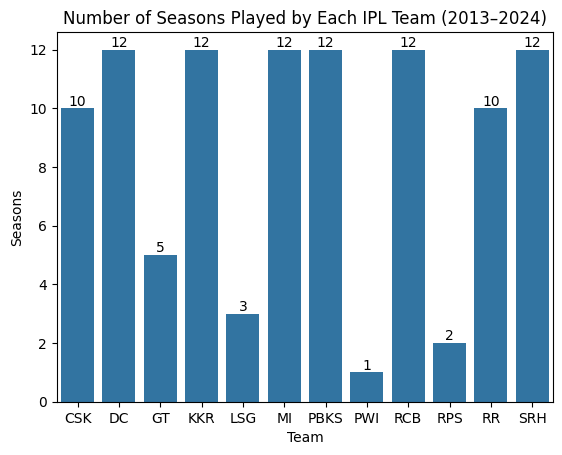

In [100]:
x=sns.barplot(data=a, y='year',x='short_form',errorbar= None )
plt.title('Number of Seasons Played by Each IPL Team (2013–2024)')
plt.ylabel('Seasons')
plt.xlabel('Team')
for y in x.containers:
    x.bar_label(y)
plt.show()

## 2. Which year had the highest funds remaining after the auction?

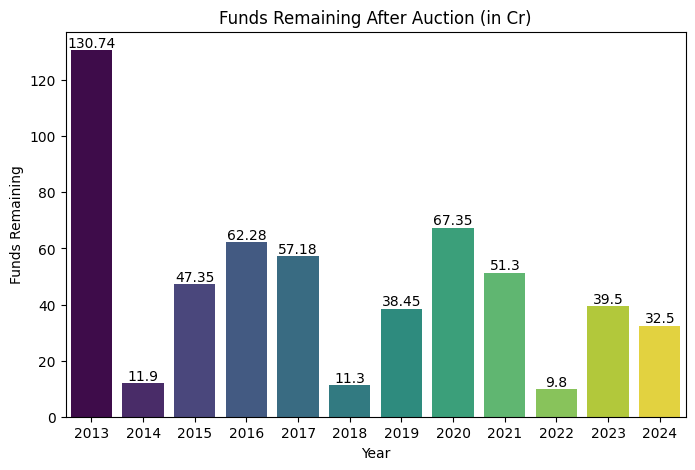

In [101]:
plt.figure(figsize=(8,5))
x=sns.barplot(data=overview, y='funds_remaining_in_cr',x='year', hue='year',palette='viridis',
            errorbar= None, legend= False, estimator='sum')
plt.title('Funds Remaining After Auction (in Cr)')
plt.ylabel('Funds Remaining')
plt.xlabel('Year')
for y in x.containers:
    x.bar_label(y)
plt.show()

## 3. Which team spent the most on top players in 2024

In [102]:
a=top_buys[top_buys.year==2024]
b=a.groupby('team_names')['price_in_rs_cr'].sum().reset_index()
c= b.sort_values(by='price_in_rs_cr', ascending=False)
c

,team_names,price_in_rs_cr
2,Kolkata Knight Riders,24.75
0,Chennai Super Kings,22.40
6,Sunrisers Hyderabad,20.50
3,Punjab Kings,19.75
1,Gujarat Titans,17.40
5,Royal Challengers Bangaluru,11.50
4,Rajasthan Royals,7.40


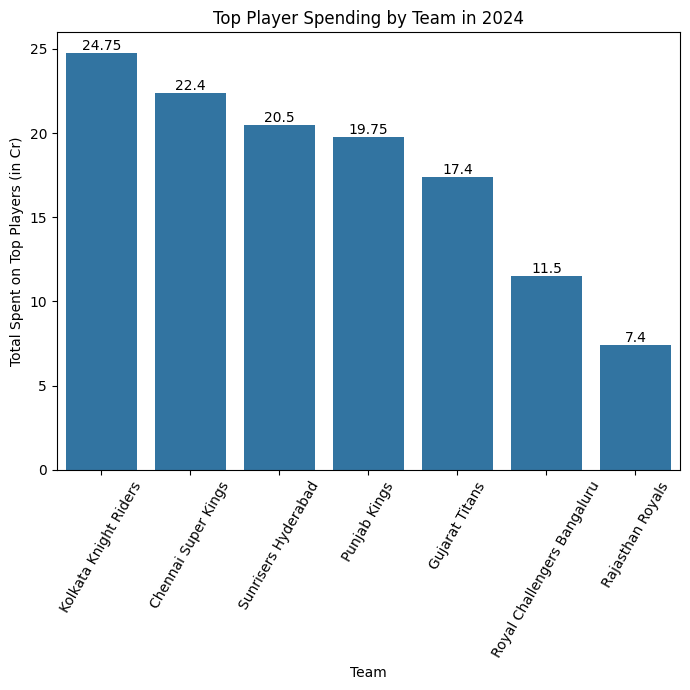

In [103]:
plt.figure(figsize=(7,7))
x=sns.barplot(data=c, y='price_in_rs_cr',x='team_names',errorbar= None, legend= False,
           estimator='sum')
plt.title('Top Player Spending by Team in 2024')
plt.ylabel('Total Spent on Top Players (in Cr)')
plt.xlabel('Team')
plt.xticks(rotation=60)
plt.tight_layout()
for y in x.containers:
    x.bar_label(y)
plt.show()

## 4. Comparison of Overseas vs Total Players in Each Team

In [104]:
df_melted = overview.melt(id_vars='short_form', 
                   value_vars=['overseas_players', 'total_players'],
                   var_name='Player Type', 
                   value_name='Count')
df_melted

,short_form,Player Type,Count
0,CSK,overseas_players,8
1,DC,overseas_players,8
2,GT,overseas_players,8
3,KKR,overseas_players,8
4,LSG,overseas_players,8
...,...,...,...
201,MI,total_players,28
202,PWI,total_players,33
203,RR,total_players,21
204,RCB,total_players,31


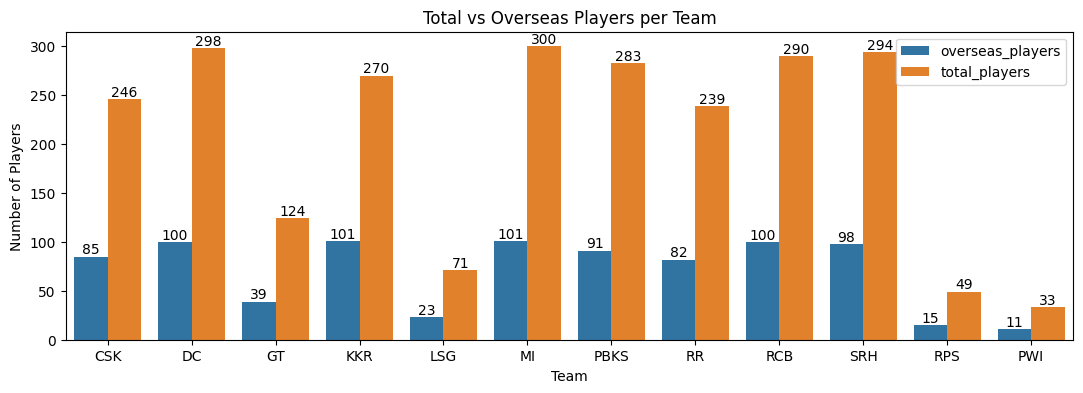

In [105]:
plt.figure(figsize=(13,4))
x=sns.barplot(data=df_melted,x='short_form',y='Count',hue='Player Type',errorbar=None,estimator='sum')
for y in x.containers:
    x.bar_label(y)
plt.title('Total vs Overseas Players per Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.legend(loc='upper right')
plt.show() # teams with numnber of seasons played 
           #CSK	10 ,DC	12 ,GT	5, KKR	12, LSG	3,MI 12,PBKS 12, PWI 1,RCB 12,RPS 2,RR 10,SRH 12

## 5. Trend of Highest Sold Player Prices over the Years

In [106]:
a= sold_players.groupby('year')['price_in_per_10_lakh'].max().to_frame("price_in_per_10_lakh")
a

,price_in_per_10_lakh
year,
2013,1.0
2014,140.0
2015,160.0
2016,95.0
2017,145.0
2018,125.0
2019,84.0
2020,155.0
2021,162.5


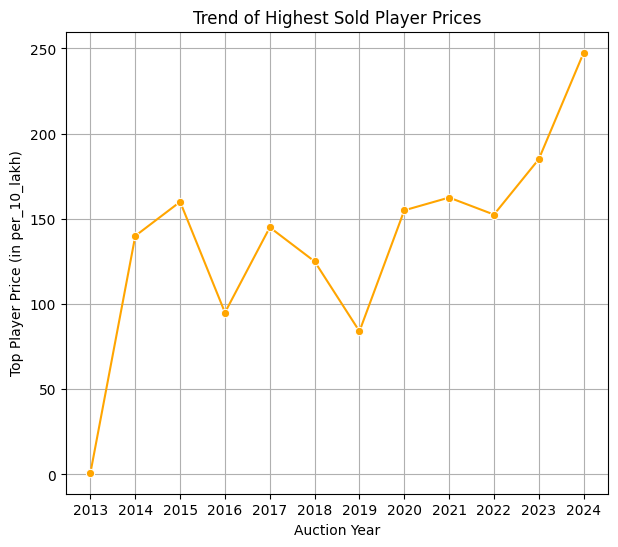

In [107]:
plt.figure(figsize=(7,6))
x=sns.lineplot(data=a,x='year',y='price_in_per_10_lakh',marker='o', color='orange')
plt.title('Trend of Highest Sold Player Prices')
plt.xlabel('Auction Year', fontsize=10)
plt.ylabel('Top Player Price (in per_10_lakh)', fontsize=10)
plt.xticks(a.index)
plt.grid()
# plt.ylim(0, 30) #In 2013, a player was sold for 10 lakh, but in the graph it appears as if the point is at 0,
                 # which is misleading.This is likely due to the scale of the Y-axis.If you run the code for this line,
                # or check the output of the previous cell, you’ll understand it better
plt.show()

## 6. Distribution of Player Types (All-Rounder, Bowler, Batter, etc.) Sold in Auctions

In [108]:
a=sold_players.groupby('type')['player_name'].count()
a

type
All-Rounder      405
Batsman          198
Bowler           405
Wicket-Keeper    114
Name: player_name, dtype: int64

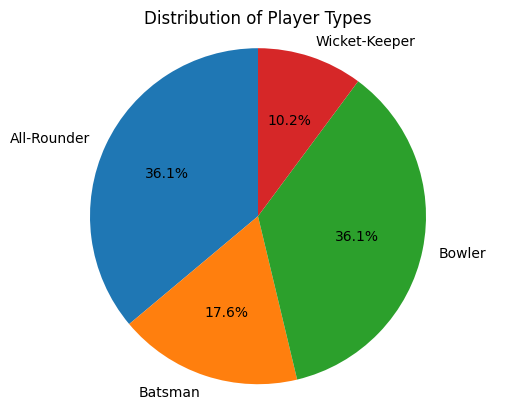

In [109]:
plt.pie(data=a, x=a.values,labels=a.index,autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Player Types")
plt.axis('equal')
plt.show()

## 7. Top 10 Most Expensive Buys in IPL History

In [110]:
a= top_buys.sort_values(by='price_in_rs_cr',ascending= False).head(10)
a

,team_names,player_name,type,year,price_in_rs_cr
0,Kolkata Knight Riders,Mitchell Starc,Bowler,2024,24.75
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,2024,20.50
10,Punjab Kings,Sam Curran,All-Rounder,2023,18.50
11,Mumbai Indians,Cameron Green,All-Rounder,2023,17.50
12,Chennai Super Kings,Ben Stokes,All-Rounder,2023,16.25
31,Rajasthan Royals,Christopher Morris,All-Rounder,2021,16.25
13,Lucknow Super Giants,Nicholas Pooran,Wicket-Keeper,2023,16.00
79,Delhi Capitals,Yuvraj Singh,Batsman,2015,16.00
39,Kolkata Knight Riders,Pat Cummins,All-Rounder,2020,15.50
20,Mumbai Indians,Ishan Kishan,Wicket-Keeper,2022,15.25


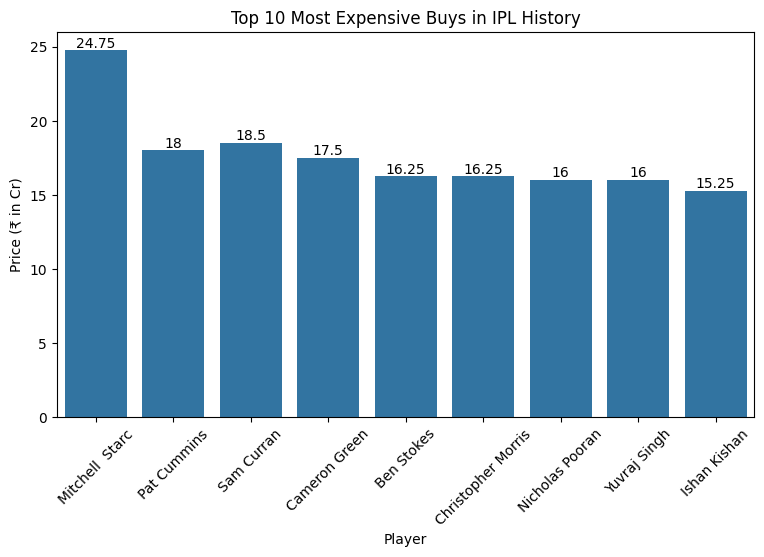

In [111]:
plt.figure(figsize=(9,5))
x=sns.barplot(data=a,x='player_name', y='price_in_rs_cr',errorbar= None)
plt.title('Top 10 Most Expensive Buys in IPL History')
plt.ylabel('Price (₹ in Cr)')
plt.xlabel('Player')
for y in x.containers:
    x.bar_label(y)
plt.xticks(rotation=45)
plt.show()

## 8. Top Player Spending Trend of Top 5 Teams Across Years

In [112]:
sold_players['price_in_cr'] = sold_players['price_in_per_10_lakh'] / 10
total_spend = sold_players.groupby('short_form')['price_in_cr'].sum().sort_values(ascending=False)
top5_teams = total_spend.head(5).index.tolist()
top5_df = sold_players[sold_players['short_form'].isin(top5_teams)]
trend_df = top5_df.groupby(['year', 'short_form'])['price_in_cr'].sum().reset_index()

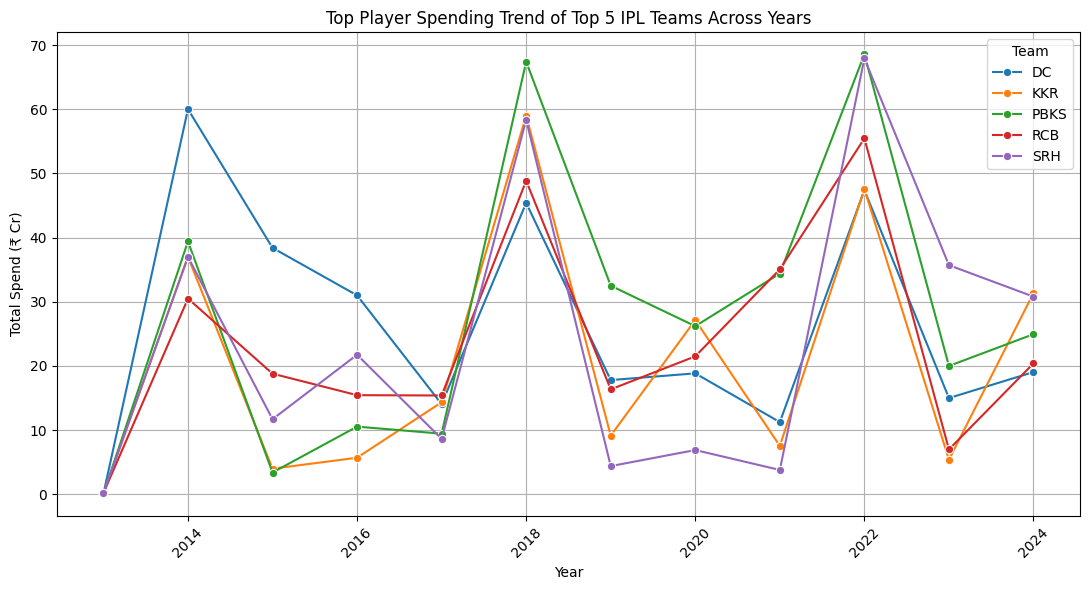

In [113]:
plt.figure(figsize=(11, 6))
sns.lineplot(data=trend_df, x='year', y='price_in_cr', hue='short_form', marker= 'o')
plt.title('Top Player Spending Trend of Top 5 IPL Teams Across Years')
plt.xlabel('Year')
plt.ylabel('Total Spend (₹ Cr)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Team')
plt.tight_layout()
plt.show()

## 9. Show top 10 most frequently appearing player_name

In [114]:
a= sold_players['player_name'].value_counts().sort_values(ascending= False).head(10).reset_index()
a.columns = ['player_name', 'times_auctioned']
a

,player_name,times_auctioned
0,Jaydev Unadkat,11
1,Nathan Coulter-Nile,7
2,Mohit Sharma,6
3,Amit Mishra,6
4,Christopher Morris,5
5,Karun Nair,5
6,Glenn Maxwell,5
7,Deepak Hooda,5
8,Jason Holder,5
9,Yuvraj Singh,5


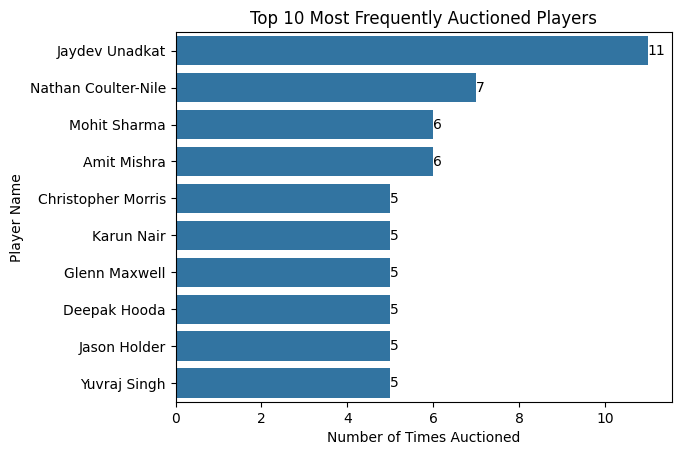

In [115]:
x=sns.barplot(data=a, x='times_auctioned', y='player_name')
plt.title('Top 10 Most Frequently Auctioned Players')
plt.xlabel('Number of Times Auctioned')
plt.ylabel('Player Name')
for y in x.containers:
    x.bar_label(y)
plt.show()

## 10. Are expensive players mostly all-rounders

In [116]:
a= sold_players.groupby('type')['price_in_cr'].sum().reset_index().sort_values('price_in_cr', ascending=False)
a

,type,price_in_cr
0,All-Rounder,897.520
2,Bowler,779.543
1,Batsman,441.670
3,Wicket-Keeper,233.054


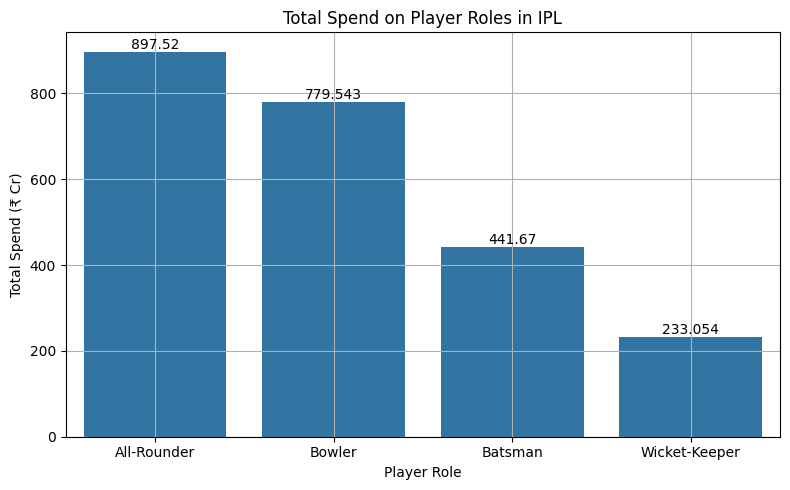

In [126]:
plt.figure(figsize=(8, 5))
x=sns.barplot(data=a, x='type', y='price_in_cr')
plt.title('Total Spend on Player Roles in IPL')
plt.xlabel('Player Role')
plt.ylabel('Total Spend (₹ Cr)')
for y in x.containers:
    x.bar_label(y)
plt.tight_layout()
plt.grid()
plt.show()

## 11. Which team paid the highest total in a single year?

In [214]:
from tabulate import tabulate
a = sold_players.groupby(['year', 'short_form'])['price_in_cr'].sum().to_frame()
b= a.groupby(level='year')['price_in_cr'].idxmax()
result = a.loc[b].reset_index()
print(tabulate(result, headers='keys', tablefmt='grid', showindex=False,floatfmt=".2f"))

+--------+--------------+---------------+
|   year | short_form   |   price_in_cr |
+========+==============+===============+
|   2013 | PWI          |          0.25 |
+--------+--------------+---------------+
|   2014 | DC           |         60.00 |
+--------+--------------+---------------+
|   2015 | DC           |         38.40 |
+--------+--------------+---------------+
|   2016 | DC           |         31.00 |
+--------+--------------+---------------+
|   2017 | RPS          |         17.20 |
+--------+--------------+---------------+
|   2018 | PBKS         |         67.40 |
+--------+--------------+---------------+
|   2019 | PBKS         |         32.50 |
+--------+--------------+---------------+
|   2020 | KKR          |         27.15 |
+--------+--------------+---------------+
|   2021 | RCB          |         35.05 |
+--------+--------------+---------------+
|   2022 | PBKS         |         68.55 |
+--------+--------------+---------------+
|   2023 | SRH          |         

## 12. Which teams had the largest squads (most players) in each year?

In [215]:
a= overview.groupby('year')['total_players'].idxmax()
b= overview.loc[a].reset_index(drop=True)
b

,team_names,overseas_players,total_players,year,short_form,funds_remaining_in_cr
0,Pune Warriors India,11,33,2013,PWI,4.27
1,Chennai Super Kings,9,25,2014,CSK,0.20
2,Mumbai Indians,9,26,2015,MI,4.90
3,Delhi Capitals,9,27,2016,DC,6.15
4,Gujarat Titans,8,27,2017,GT,10.50
5,Chennai Super Kings,8,25,2018,CSK,6.50
6,Chennai Super Kings,8,25,2019,CSK,3.20
7,Punjab Kings,8,25,2020,PBKS,16.50
8,Chennai Super Kings,8,25,2021,CSK,2.55
9,Chennai Super Kings,8,25,2022,CSK,2.95


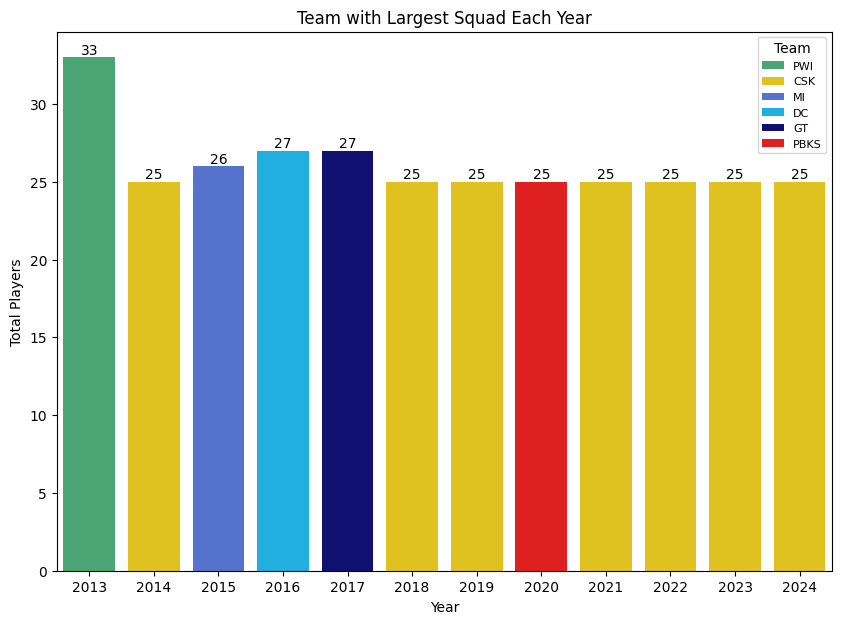

In [216]:
plt.figure(figsize=(10,7))
color={'CSK': 'gold',
    'MI': 'royalblue',
    'DC': 'deepskyblue',
    'GT': 'navy',
    'PBKS': 'red',       
    'PWI': 'mediumseagreen'}
x=sns.barplot(data=b,x='year',y='total_players', hue='short_form',errorbar= None,palette=color)
plt.title('Team with Largest Squad Each Year')
plt.xlabel('Year')
plt.ylabel('Total Players')
for y in x.containers:
    x.bar_label(y)
plt.legend(title='Team', prop={'size':8})
plt.show()

## 13. Which player type received the most expensive buy each year?

In [217]:
idx= top_buys.groupby('year')['price_in_rs_cr'].idxmax()
a= top_buys.loc[idx].reset_index(drop=True)
a

,team_names,player_name,type,year,price_in_rs_cr
0,Mumbai Indians,Glenn Maxwell,All-Rounder,2013,5.32
1,Royal Challengers Bangaluru,Yuvraj Singh,All-Rounder,2014,14.00
2,Delhi Capitals,Yuvraj Singh,Batsman,2015,16.00
3,Royal Challengers Bangaluru,Shane Watson,All-Rounder,2016,9.50
4,Rising Pune Supergiant,Benjamin Stokes,All-Rounder,2017,14.50
5,Rajasthan Royals,Benjamin Stokes,All-Rounder,2018,12.50
6,Rajasthan Royals,Jaydev Unadkat,Bowler,2019,8.40
7,Kolkata Knight Riders,Pat Cummins,All-Rounder,2020,15.50
8,Rajasthan Royals,Christopher Morris,All-Rounder,2021,16.25
9,Mumbai Indians,Ishan Kishan,Wicket-Keeper,2022,15.25


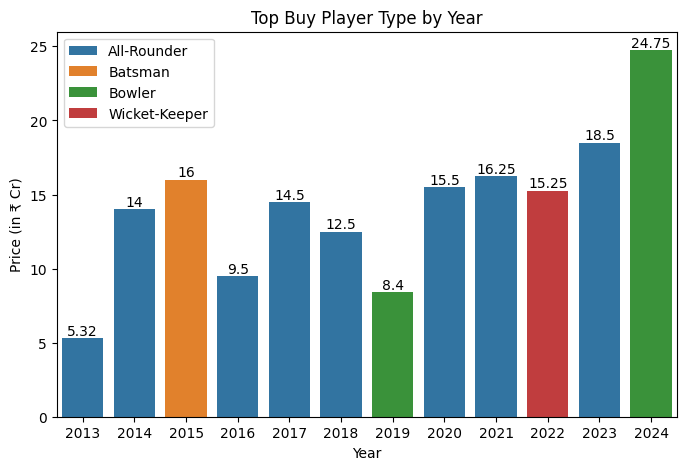

In [212]:
plt.figure(figsize=(8,5))
ax= sns.barplot(data=a, x='year', y='price_in_rs_cr', hue='type')
plt.title("Top Buy Player Type by Year")
plt.xlabel('Year')
plt.ylabel('Price (in ₹ Cr)')
for x in ax.containers:
    ax.bar_label(x)
plt.legend()
plt.show()